In [24]:
!pip install keras
!pip install tensorflow

In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [26]:
df=pd.read_csv("./Data/heart.csv")
pd.set_option('display.max_columns', None)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


Dataset description

In [27]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.536390
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.285822
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.260000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.710000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,0.810000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.900000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


In [29]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

C:\Users\marti\AppData\Local\Temp\ipykernel_28768\3731194287.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'sex',  palette='Set3', data = df, order = df['sex'].value_counts().index)
C:\Users\marti\AppData\Local\Temp\ipykernel_28768\3731194287.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'cp', palette='Set3', data = df)
C:\Users\marti\AppData\Local\Temp\ipykernel_28768\3731194287.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'fbs', palette='Set3', data = df)


Text(0.5, 1.0, 'fbs')

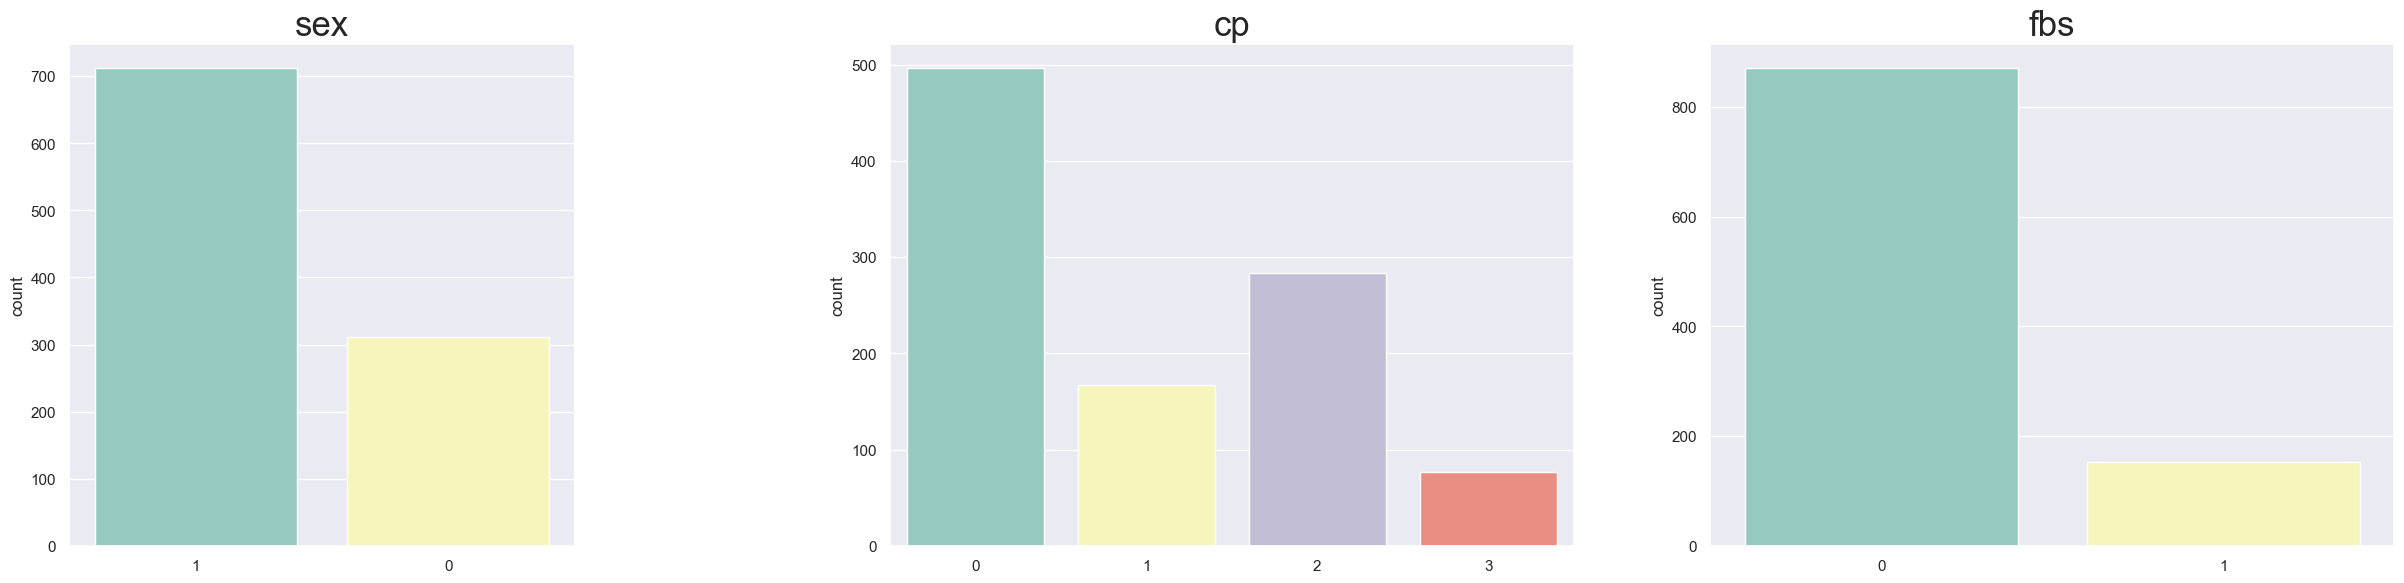

In [30]:
plt.figure(figsize=(30,30))
plt.subplot(4,4,1)
sns.countplot(x = 'sex',  palette='Set3', data = df, order = df['sex'].value_counts().index)
plt.gca().set(xlabel=None)
plt.title('sex', fontsize=25)

plt.subplot(4,3,2)
sns.countplot(x = 'cp', palette='Set3', data = df)
plt.gca().set(xlabel=None)
plt.title('cp', fontsize=25)

plt.subplot(4,3,3)
sns.countplot(x = 'fbs', palette='Set3', data = df)
plt.gca().set(xlabel=None)
plt.title('fbs', fontsize=25)



C:\Users\marti\AppData\Local\Temp\ipykernel_28768\1215815037.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'restecg',  palette='Set3', data = df)
C:\Users\marti\AppData\Local\Temp\ipykernel_28768\1215815037.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'exang', palette='Set3', data = df)
C:\Users\marti\AppData\Local\Temp\ipykernel_28768\1215815037.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'slope', palette='Set3', data = df)


Text(0.5, 1.0, 'slope')

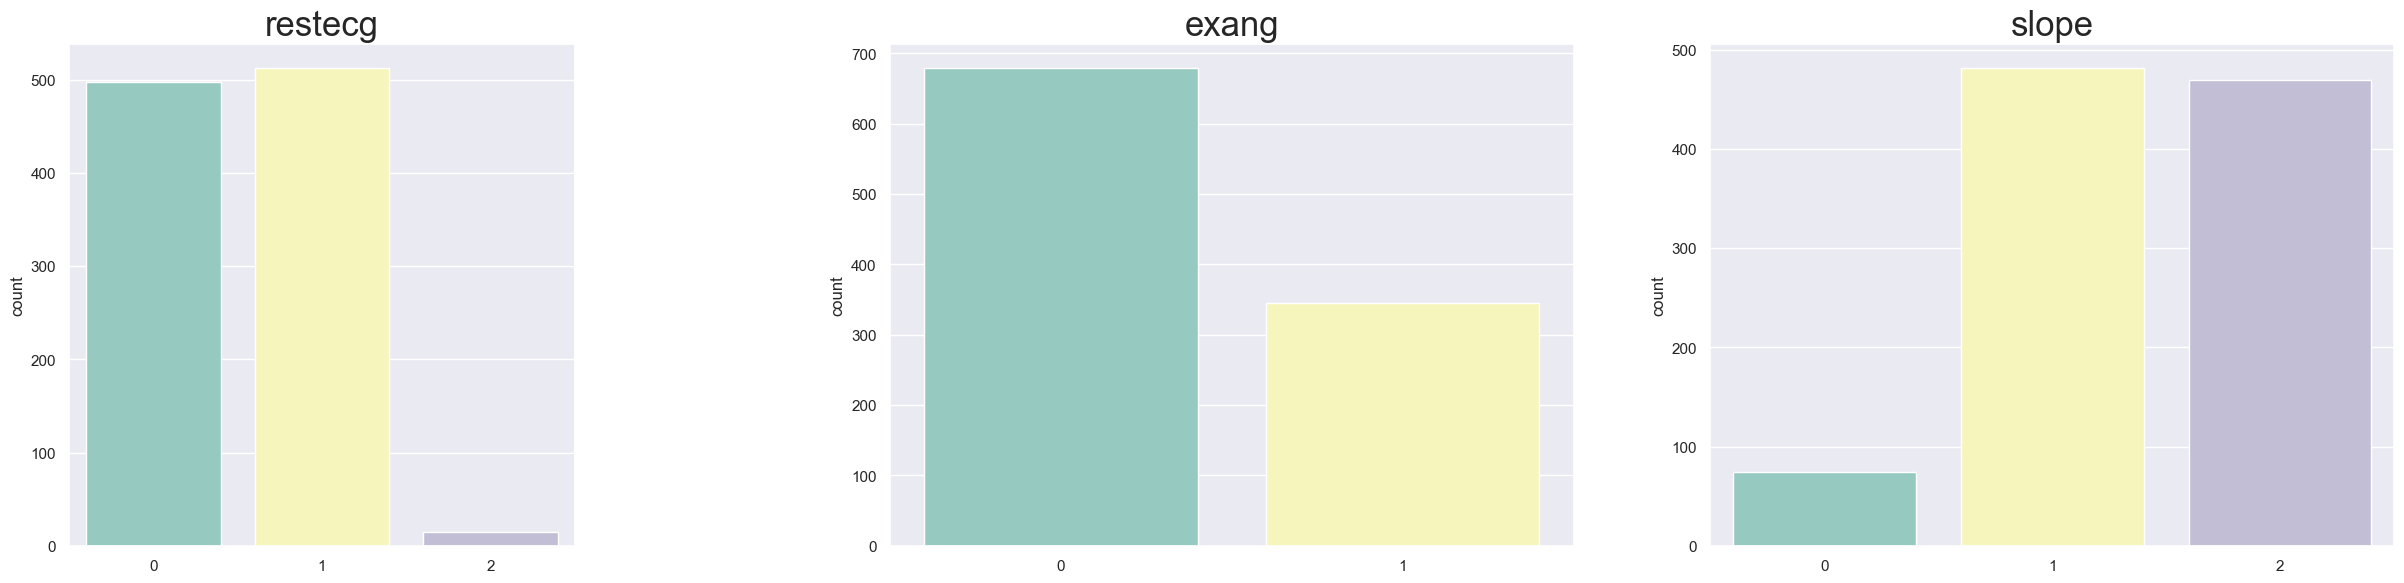

In [31]:
plt.figure(figsize=(30,30))
plt.subplot(4,4,1)
sns.countplot(x = 'restecg',  palette='Set3', data = df)
plt.gca().set(xlabel=None)
plt.title('restecg', fontsize=25)

plt.subplot(4,3,2)
sns.countplot(x = 'exang', palette='Set3', data = df)
plt.gca().set(xlabel=None)
plt.title('exang', fontsize=25)

plt.subplot(4,3,3)
sns.countplot(x = 'slope', palette='Set3', data = df)
plt.gca().set(xlabel=None)
plt.title('slope', fontsize=25)



C:\Users\marti\AppData\Local\Temp\ipykernel_28768\3205284847.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'ca',  palette='Set3', data = df)
C:\Users\marti\AppData\Local\Temp\ipykernel_28768\3205284847.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'thal', palette='Set3', data = df)


Text(0.5, 1.0, 'thal')

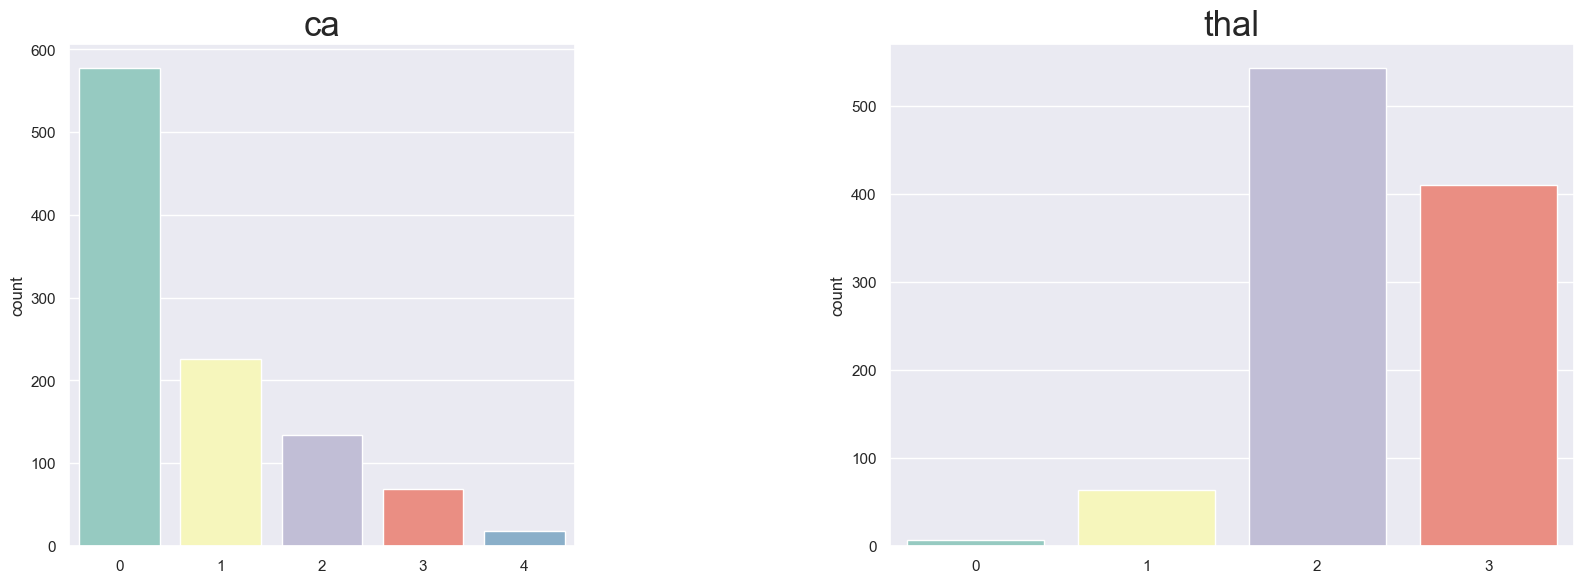

In [32]:
plt.figure(figsize=(30,30))
plt.subplot(4,4,1)
sns.countplot(x = 'ca',  palette='Set3', data = df)
plt.gca().set(xlabel=None)
plt.title('ca', fontsize=25)


plt.subplot(4,3,2)
sns.countplot(x = 'thal', palette='Set3', data = df)
plt.gca().set(xlabel=None)
plt.title('thal', fontsize=25)




C:\Users\marti\AppData\Local\Temp\ipykernel_28768\676090442.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.target, kde = False)


<Axes: xlabel='target'>

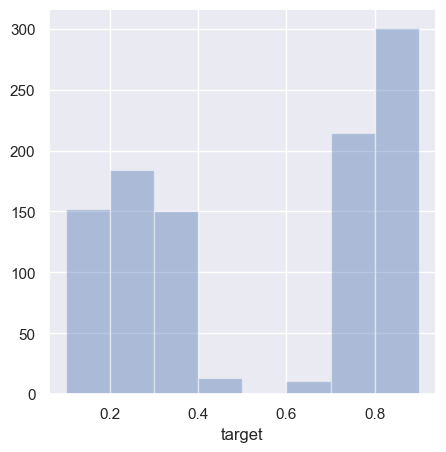

In [33]:
plt.figure(figsize=(5,5))
sns.distplot(df.target, kde = False)


C:\Users\marti\AppData\Local\Temp\ipykernel_28768\1861250348.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age, kde = False)
C:\Users\marti\AppData\Local\Temp\ipykernel_28768\1861250348.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.trestbps, kde = False)


<Axes: xlabel='trestbps'>

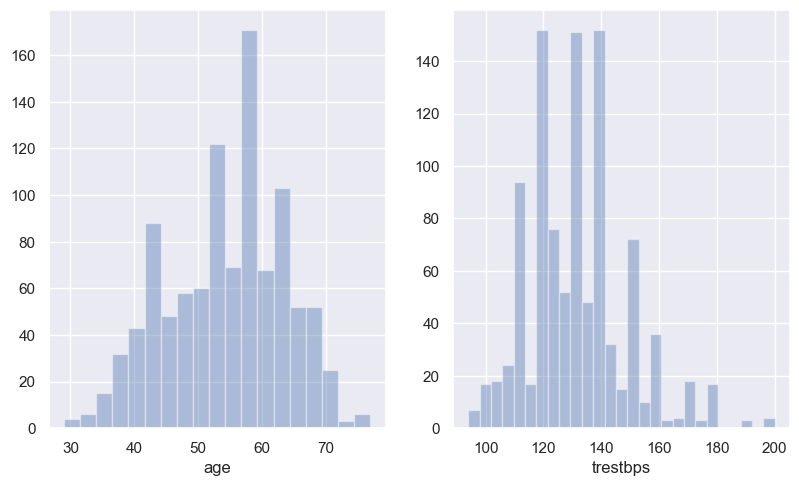

In [34]:
plt.figure(figsize = (20,25))

sns.set(color_codes = True)

plt.subplot(4,4,1)
sns.distplot(df.age, kde = False)

plt.subplot(4,4,2)
sns.distplot(df.trestbps, kde = False)





C:\Users\marti\AppData\Local\Temp\ipykernel_28768\1536109636.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.chol, kde = False)
C:\Users\marti\AppData\Local\Temp\ipykernel_28768\1536109636.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.thalach, kde = False)
C:\Users\marti\AppData\

<Axes: xlabel='oldpeak'>

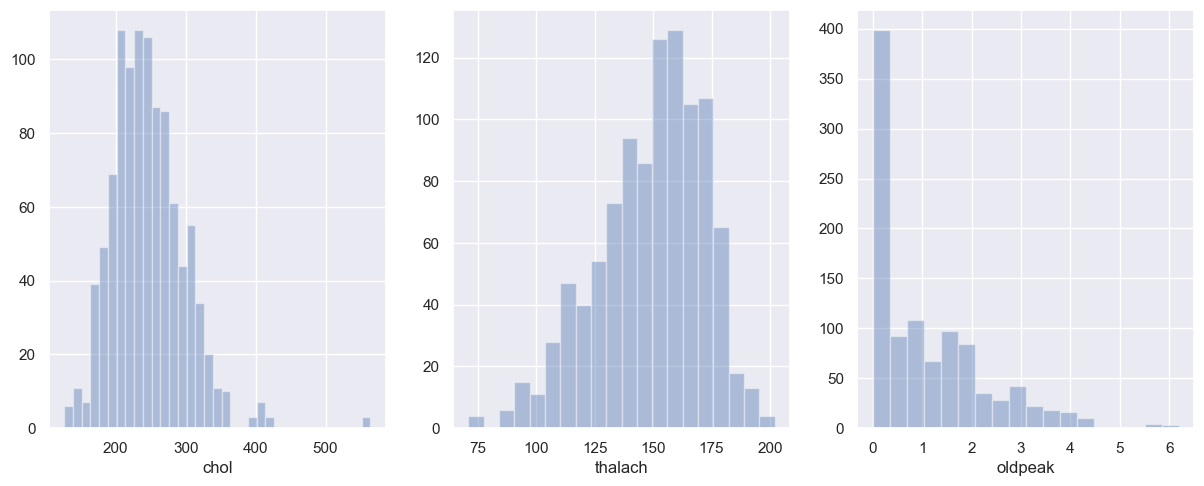

In [35]:
plt.figure(figsize = (20,25))

sns.set(color_codes = True)

plt.subplot(4,4,1)
sns.distplot(df.chol, kde = False)

plt.subplot(4,4,2)
sns.distplot(df.thalach, kde = False)

plt.subplot(4,4,3)
sns.distplot(df.oldpeak, kde = False)




Converting the continuous target values to discrete ones 

<Axes: >

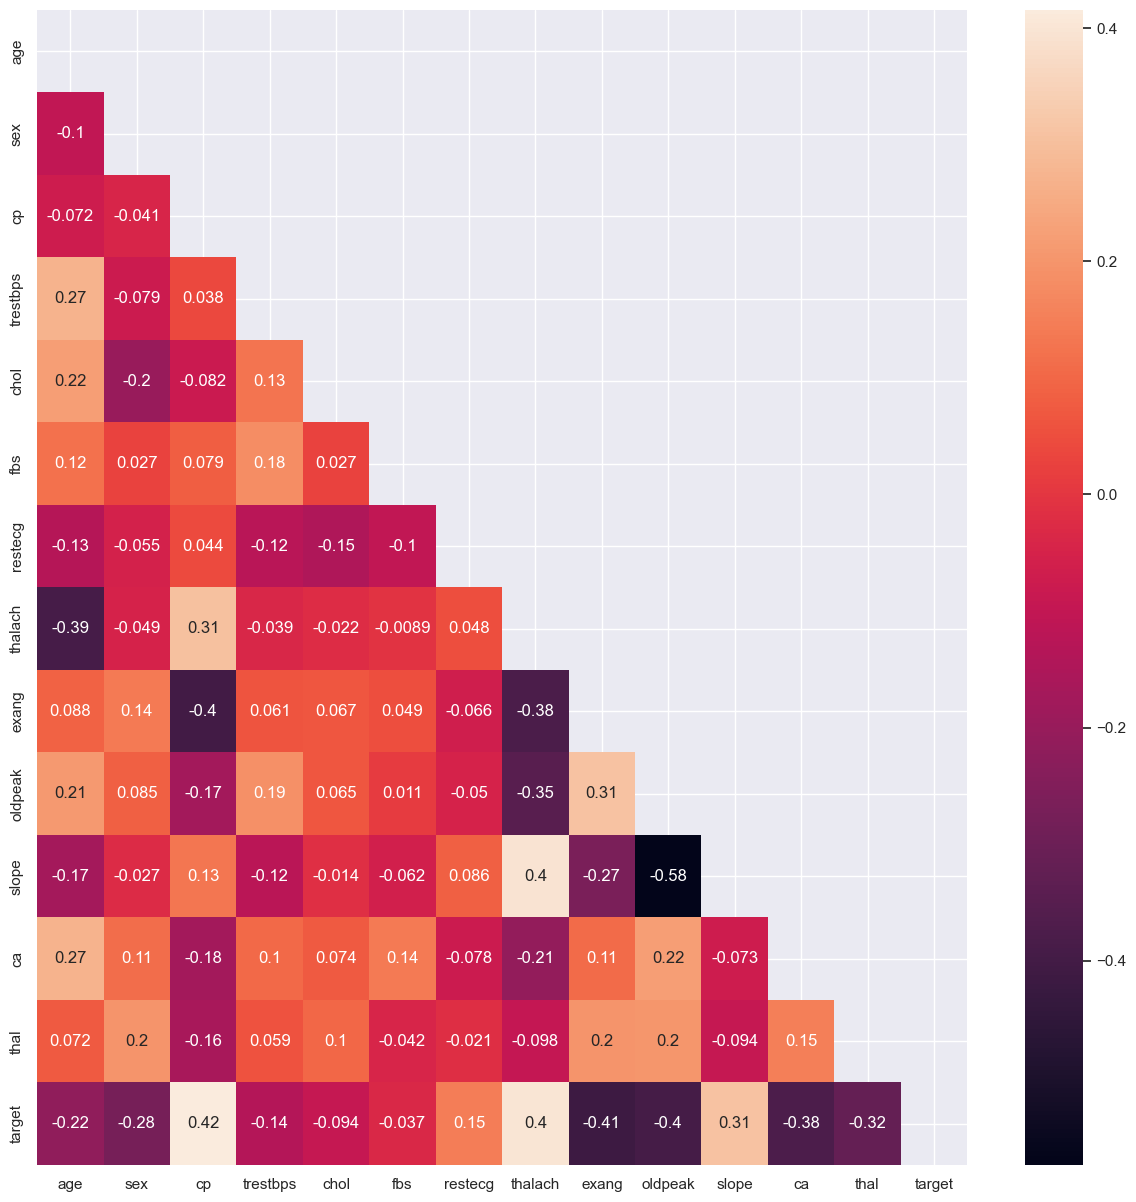

In [36]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,mask=np.triu(np.ones_like(corr,dtype=bool)))


In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [38]:
X = df.drop(columns='target', axis=1)
Y = df['target']
print(X)
print(Y)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

Split data

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=42)
print(X.shape, X_train.shape, X_test.shape, Y_train.shape)

(1025, 13) (820, 13) (205, 13) (820,)


In [49]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor(n_estimators=100)


rfr.fit(X_train, Y_train)


Y_pred = rfr.predict(X_test)

print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred))
print("R^2 Score:", r2_score(Y_test, Y_pred))


tree_depths = [tree.tree_.max_depth for tree in rfr.estimators_]
leaf_counts = [tree.tree_.n_leaves for tree in rfr.estimators_]



print(f"Depths of all trees: {tree_depths}")
print(f"Maximum depth in the forest: {max(tree_depths)}")
print(f"Minimum depth in the forest: {min(tree_depths)}")

print(f"Nodes of all trees: {leaf_counts}")
print(f"Maximum nodes in the forest: {max(leaf_counts)}")
print(f"Minimum nodes in the forest: {min(leaf_counts)}")

Mean Squared Error: 0.009374890037551672
R^2 Score: 0.8854560711262163
Depths of all trees: [17, 19, 18, 22, 22, 15, 16, 17, 20, 21, 16, 20, 21, 18, 18, 17, 18, 20, 15, 19, 17, 21, 19, 20, 21, 19, 17, 16, 17, 20, 19, 18, 17, 18, 18, 22, 21, 16, 26, 20, 18, 15, 15, 19, 18, 20, 18, 20, 18, 20, 16, 16, 20, 19, 16, 16, 21, 19, 18, 17, 17, 19, 17, 17, 18, 23, 20, 13, 19, 17, 22, 17, 16, 18, 16, 18, 17, 17, 17, 21, 16, 19, 22, 16, 21, 18, 21, 17, 18, 20, 19, 16, 22, 18, 18, 21, 16, 18, 19, 18]
Maximum depth in the forest: 26
Minimum depth in the forest: 13
Nodes of all trees: [276, 274, 269, 263, 266, 270, 269, 269, 274, 271, 267, 264, 269, 268, 276, 262, 272, 263, 274, 261, 277, 268, 272, 276, 280, 271, 267, 268, 269, 274, 268, 272, 267, 267, 268, 273, 268, 269, 274, 272, 269, 270, 273, 269, 269, 272, 274, 267, 274, 272, 261, 265, 265, 265, 276, 265, 277, 266, 277, 274, 257, 275, 275, 278, 270, 272, 271, 267, 268, 271, 272, 263, 267, 270, 264, 268, 270, 273, 274, 268, 264, 269, 267, 274, 27

In [52]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [10, 12, 20, 25, 30],
    'max_leaf_nodes': [220, 240, 260, 280, 300], 
} 

grid_search = GridSearchCV(RandomForestRegressor(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, Y_train) 
print(grid_search.best_estimator_) 

RandomForestRegressor(max_depth=30, max_features='log2', max_leaf_nodes=280,
                      n_estimators=150)


In [53]:
rfrgrid = RandomForestRegressor(n_estimators=150, max_depth=30, max_leaf_nodes=280, max_features='log2')


rfrgrid.fit(X_train, Y_train)


Y_pred = rfrgrid.predict(X_test)

print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred))
print("R^2 Score:", r2_score(Y_test, Y_pred))

Mean Squared Error: 0.010105166508065689
R^2 Score: 0.8765334346193671
